# Access the MET collection via API
### for the Cultural Data Sculpting course at EPFL

In [1]:
import urllib.request, urllib.error, urllib.parse
import csv
from bs4 import BeautifulSoup
import html2text
import os
from datetime import datetime
import numpy as np
import pandas as pd
import json
from urllib.request import urlopen
from PIL import Image

In [2]:
# function to check if 'nan'
def isnan(x):
    return (x != x)

In [3]:
#os.listdir('../data')

In [4]:
# open artist-metadata csv
filename = '../data/artist_qid_html.csv'
#csv_file = csv.reader(open(filename, "r"))
df_test = pd.read_csv(filename)
df_test.columns

Index(['Unnamed: 0', 'Name', 'Wikidata-Q-ID', 'Wikipedia-URL', 'URL-names',
       'Summary', 'Wikipedia-json', 'image', 'thumbnail', 'birth', 'death',
       'timeline_position', 'VIAF', 'wikidata', 'MET Object Indices',
       'REAL MET Object IDS', 'cloudinary thumbnails', 'URLs MET',
       'cloudinary artworks', 'Rijks name', 'URLs Rijk', 'Rijks img dates',
       'Rijks img PIDs', 'Rijks img Inrs', 'extract_html'],
      dtype='object')

In [45]:
#df_test['extract_html'][8]

### load MET Objects.csv with all the objects of the MET collection

In [12]:
#os.listdir()

In [9]:
filename = 'MetObjects.csv'
csv_file = csv.reader(open(filename, "r"))
MET = pd.read_csv(filename,  low_memory=False)


In [10]:
MET

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475772,2021.60.10,False,False,False,852903,NaN,Drawings and Prints,NaN,Poster,Black Women’s Wisdom: Amelia Boynton,...,NaN,Posters,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
475773,83.2.934,False,False,False,852913,NaN,Drawings and Prints,NaN,Print,Toussaint L’Ouverture on Horseback,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
475774,83.2.936,False,False,False,852915,NaN,Drawings and Prints,NaN,Print,Toussaint L’Ouverture on Horseback,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
475775,1984.1188.1,False,False,False,852928,NaN,Drawings and Prints,NaN,Print,Composition in Black and Blue,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [11]:
MET.columns

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL'],
      dtype='object')

### get the column MET['Artist Wikidata URL'] to compare with Vasari Dataframe

In [9]:
# try and test
MET_urlist = np.array(MET['Artist Wikidata URL']) 
MET_urlist[475726].strip('|').split('|')[0]

'https://www.wikidata.org/wiki/Q214957'

In [10]:
# prepare MET artist wikidata list:
liste = []
for i in MET_urlist:
    if isnan(i):
        liste.append('nan')
    else:
        liste.append(i.strip('|').split('|')[0]) 
    
liste[3555]

'https://www.wikidata.org/wiki/Q3041258'

In [11]:
# prepare df for MET artist wikidata list
wikidata = []
for i in df['Wikidata-Q-ID']:
    wikidata.append('https://www.wikidata.org/wiki/' + str(i))

df['wikidata'] = wikidata    
#df

## if the Wikidata artist URL is in the MET Object list, store the index of the object

In [12]:
liste = []
for i in df['wikidata']:
    if i in MET_urlist:
        liste.append(np.where(MET_urlist == i)[0])
    else:
        liste.append('nan')
df['MET Object Indices'] = liste
#df

### get the MET Object IDs for the artworks

In [14]:
# process indices to real MET Object IDs

liste = []
for i in df['MET Object Indices']:
    if i == 'nan':
        liste.append('nan')
    else:
        storage = []
        for j in i:
            storage.append(MET.iloc[j]['Object ID'])
        liste.append(storage)
            
df['REAL MET Object IDS'] = liste
#df

<ipython-input-14-ef4217cdccb2>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if i == 'nan':


## save as csv

In [16]:
#df.to_csv('artist_qid_backup.csv', index = False, header=True)
#df = pd.read_csv('artist_qid_backup.csv')
df

,Unnamed: 0,Name,Wikidata-Q-ID,Wikipedia-URL,URL-names,Summary,Wikipedia-json,image,thumbnail,birth,death,timeline_position,VIAF,wikidata,MET Object Indices,REAL MET Object IDS,cloudinary thumbnails,URL-list-small,cloudinary artworks
0,0,Cimabue,Q15790,https://en.wikipedia.org/wiki/Cimabue,Cimabue,"Cimabue, also known as Cenni di Pepo or Cenni ...","{'type': 'standard', 'title': 'Cimabue', 'disp...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1240,1302,1271,11146779,https://www.wikidata.org/wiki/Q15790,NaN,NaN,https://res.cloudinary.com/dfyzsulq8/image/upl...,['nan'],NaN
1,1,Arnolfo di Lapo,Q315249,https://en.wikipedia.org/wiki/Arnolfo_di_Cambio,Arnolfo_di_Cambio,Arnolfo di Cambio was an Italian architect and...,"{'type': 'standard', 'title': 'Arnolfo di Camb...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1240,1302,1271,265308757,https://www.wikidata.org/wiki/Q315249,NaN,NaN,https://res.cloudinary.com/dfyzsulq8/image/upl...,['nan'],NaN
2,2,Bonanno,Q892084,https://en.wikipedia.org/wiki/Bonanno_Pisano,Bonanno_Pisano,"Bonanno Pisano (Pisa), active in the 1170s and...","{'type': 'standard', 'title': 'Bonanno Pisano'...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,9999,9999,9999,95743493,https://www.wikidata.org/wiki/Q892084,NaN,NaN,https://res.cloudinary.com/dfyzsulq8/image/upl...,['nan'],NaN
3,3,Nicola Pisano,Q364413,https://en.wikipedia.org/wiki/Nicola_Pisano,Nicola_Pisano,Nicola Pisano was an Italian sculptor whose wo...,"{'type': 'standard', 'title': 'Nicola Pisano',...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1225,1284,1254,79399625,https://www.wikidata.org/wiki/Q364413,NaN,NaN,https://res.cloudinary.com/dfyzsulq8/image/upl...,['nan'],NaN
4,4,Giovanni Pisano,Q314932,https://en.wikipedia.org/wiki/Giovanni_Pisano,Giovanni_Pisano,"Giovanni Pisano was an Italian sculptor, paint...","{'type': 'standard', 'title': 'Giovanni Pisano...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1248,1316,1282,100174152,https://www.wikidata.org/wiki/Q314932,[313456 313457 315423 315800],"[463414, 463415, 465937, 466326]",https://res.cloudinary.com/dfyzsulq8/image/upl...,['https://images.metmuseum.org/CRDImages/md/we...,['https://res.cloudinary.com/dfyzsulq8/image/u...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,287,Dono Doni,Q714914,https://en.wikipedia.org/wiki/Dono_Doni,Dono_Doni,"Dono Doni, also known as Adone Doni or Dono de...","{'type': 'standard', 'title': 'Dono Doni', 'di...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1500,1575,1538,74702895,https://www.wikidata.org/wiki/Q714914,NaN,NaN,https://res.cloudinary.com/dfyzsulq8/image/upl...,['nan'],NaN
288,288,Cesare Nebbia,Q503575,https://en.wikipedia.org/wiki/Cesare_Nebbia,Cesare_Nebbia,Cesare Nebbia (c.1536–c.1622) was an Italian p...,"{'type': 'standard', 'title': 'Cesare Nebbia',...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1536,1614,1575,13152008,https://www.wikidata.org/wiki/Q503575,[209395 209639 209640 209658 209659 210359 210...,"[340591, 340835, 340836, 340854, 340855, 34157...",https://res.cloudinary.com/dfyzsulq8/image/upl...,['https://images.metmuseum.org/CRDImages/dp/we...,['https://res.cloudinary.com/dfyzsulq8/image/u...
289,289,Niccolò Circignani detto il Pomarancio,Q382762,https://en.wikipedia.org/wiki/Niccol%C3%B2_Cir...,Niccol%C3%B2_Circignani,Niccolò Circignani was an Italian painter of t...,"{'type': 'standard', 'title': 'Niccolò Circign...",https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...,1517,1597,1557,95809921,https://www.wikidata.org/wiki/Q382762,[211022],[342245],https://res.cloudinary.c

## get all the image URLs from MET API

In [23]:
# make list of image URLs per artist

index = 0
liste = []

for i in range(len(df)):
    
    if df['REAL MET Object IDS'][i] == 'nan':
        storage = ['nan']
        liste.append(storage)
    else:
        
        storage = []
        for j in df['REAL MET Object IDS'][i]:
            
            url = 'https://collectionapi.metmuseum.org/public/collection/v1/objects/' + str(j)
            response = urllib.request.urlopen(url) 
            webContent = response.read()
            my_json = webContent.decode('utf8')
            data = json.loads(my_json)
            storage.append(data['primaryImageSmall'])
        
    
        liste.append(storage)
    
    
    print(storage, index)
    index += 1
    
len(liste) 
df['URL-Liste-small'] = liste



['nan'] 0
['nan'] 1
['nan'] 2
['nan'] 3
['https://images.metmuseum.org/CRDImages/md/web-large/DP169508.jpg', 'https://images.metmuseum.org/CRDImages/md/web-large/DP169512.jpg', 'https://images.metmuseum.org/CRDImages/md/web-large/DP167328.jpg', 'https://images.metmuseum.org/CRDImages/md/web-large/DP169524.jpg'] 4
['nan'] 5
['nan'] 6
['nan'] 7
['https://images.metmuseum.org/CRDImages/ep/web-large/DP-19501-001.jpg'] 8
['nan'] 9
['nan'] 10
['nan'] 11
['nan'] 12
['https://images.metmuseum.org/CRDImages/ep/web-large/DP296426.jpg', 'https://images.metmuseum.org/CRDImages/rl/web-large/DT3002.jpg', 'https://images.metmuseum.org/CRDImages/rl/web-large/DP-18967-001.jpg', 'https://images.metmuseum.org/CRDImages/rl/web-large/DT3003.jpg'] 13
['https://images.metmuseum.org/CRDImages/ep/web-large/SF Lorenzetti.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP278472.jpg'] 14
['nan'] 15
['nan'] 16
['https://images.metmuseum.org/CRDImages/ep/web-large/ep41.190.26.bw.R.jpg'] 17
['nan'] 18
['h

['https://images.metmuseum.org/CRDImages/dp/web-large/DP811046.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP247059.jpg'] 80
['https://images.metmuseum.org/CRDImages/es/web-large/DP-16193-001.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DT10247.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP-19453-001.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP-19452-001.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP-19454-001.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP-19455-001.jpg'] 81
['nan'] 82
['https://images.metmuseum.org/CRDImages/ep/web-large/DT229670.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/Martini2.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DT5277.jpg', 'https://images.metmuseum.org/CRDImages/rl/web-large/DP324211.jpg', 'https://images.metmuseum.org/CRDImages/rl/web-large/DT3612.jpg'] 83
['nan'] 84
['nan'] 85
['https://images.metmuseum.org/CRDImages/ep/web-large/DP

['https://images.metmuseum.org/CRDImages/es/web-large/25408.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/25409.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/154771.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/25411.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/LC-14_114_5-001.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/LC-14_114_6-001.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/LC-14_114_7-001.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/LC-14_114_8-001.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/LC-14_114_9-001.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/LC-14_114_10-001.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/LC-14_114_11-001.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/LC-14_114_12-001.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/LC-14_114_22-001.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/LC-14_

['https://images.metmuseum.org/CRDImages/dp/web-large/DP809876.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP809877.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP-15089-001.jpg', 'https://images.metmuseum.org/CRDImages/rl/web-large/DT3182.jpg'] 162
['https://images.metmuseum.org/CRDImages/es/web-large/30705.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/DP-18976-047.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/DP-18917-001.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP141384.jpg'] 163
['https://images.metmuseum.org/CRDImages/es/web-large/66738.jpg'] 164
['nan'] 165
['https://images.metmuseum.org/CRDImages/es/web-large/LC-27_97_28-001.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/114132.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP862672.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP102196~1.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811343.jpg', 'https://

['https://images.metmuseum.org/CRDImages/dp/web-large/DP810262.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP810264.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP-17152-001.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DT504.jpg'] 207
['nan'] 208
['https://images.metmuseum.org/CRDImages/ep/web-large/DP214411.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DT11166.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP221238.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP151337.jpg'] 209
['nan'] 210
['https://images.metmuseum.org/CRDImages/es/web-large/4622.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/17374.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/23950.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/66455.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/81068.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/82386.jpg', 'https://images.metmuseum.org/CR

['https://images.metmuseum.org/CRDImages/dp/web-large/DP811741.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811744.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP-17778-001.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DT5283.jpg'] 217
['https://images.metmuseum.org/CRDImages/dp/web-large/DP811066.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811068.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811062.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811060.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811059.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811061.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811067.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811064.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DT7457.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811063.jpg', 'https://images.metmuseum.org/CRDImages/dp

['https://images.metmuseum.org/CRDImages/dp/web-large/DP330307.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP820595.jpg', '', 'https://images.metmuseum.org/CRDImages/ep/web-large/DT216453.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP239507.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DT5476.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP-16041-001.jpg', 'https://images.metmuseum.org/CRDImages/rl/web-large/DP-13665-038.jpg'] 246
['https://images.metmuseum.org/CRDImages/dp/web-large/DP820602.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811728.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP825232.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP825231.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP269462.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP269579.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP269457.jpg', 'https://images.metmuseum.org/CR

['https://images.metmuseum.org/CRDImages/dp/web-large/DP801534.jpg', '', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811555.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811556.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811554.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP812357.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811552.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DT200205.jpg', 'https://images.metmuseum.org/CRDImages/rl/web-large/DT235531.jpg', 'https://images.metmuseum.org/CRDImages/ep/web-large/DP-14882-001.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP-15570-001.jpg'] 250
['https://images.metmuseum.org/CRDImages/dp/web-large/DP811557.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/MM55271.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP854414.jpg', 'https://images.metmuseum.org/CRDImages/dp/web-large/DP811553.jpg', 'https://images.metmuseum.org/C

['https://images.metmuseum.org/CRDImages/dp/web-large/DP807710.jpg'] 278
['https://images.metmuseum.org/CRDImages/es/web-large/SF73_8_66.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/DP147770.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/DP-1235-001.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/DP-1236-001.jpg'] 279
['https://images.metmuseum.org/CRDImages/es/web-large/39650.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/55368.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/61784.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/82261.jpg', '', 'https://images.metmuseum.org/CRDImages/es/web-large/108977.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/109160.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/DP273901.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/DP155287.jpg', 'https://images.metmuseum.org/CRDImages/es/web-large/DP-15401-067.jpg', 'https://images.metmuseum.org/CRDImage

In [155]:
# make new DataFrame with reduced columns

new_df = pd.DataFrame()
new_df["URL-Liste"] = df["URL-Liste"]
new_df["Name"] = df["Name"]
new_df["URL-names"] = df["URL-names"]
new_df["timeline_position"] = df["timeline_position"]
new_df['URL-Liste-small'] = liste

new_df

,URL-Liste,Name,URL-names,timeline_position,URL-Liste-small
0,[nan],Cimabue,Cimabue,1271,[nan]
1,[nan],Arnolfo di Lapo,Arnolfo_di_Cambio,1271,[nan]
2,[nan],Bonanno,Bonanno_Pisano,9999,[nan]
3,[nan],Nicola Pisano,Nicola_Pisano,1254,[nan]
4,[https://images.metmuseum.org/CRDImages/md/ori...,Giovanni Pisano,Giovanni_Pisano,1282,[https://images.metmuseum.org/CRDImages/md/web...
...,...,...,...,...,...
287,[nan],Dono Doni,Dono_Doni,1538,[nan]
288,[https://images.metmuseum.org/CRDImages/dp/ori...,Cesare Nebbia,Cesare_Nebbia,1575,[https://images.metmuseum.org/CRDImages/dp/web...
289,[https://images.metmuseum.org/CRDImages/dp/ori...,Niccolò Circignani detto il Pomarancio,Niccol%C3%B2_Circignani,1557,[https://images.metmuseum.org/CRDImages/dp/web...
290,[https://images.metmuseum.org/CRDImages/dp/ori...,Bronzino,Bronzino,1538,[https://images.metmuseum.org/CRDImages/dp/web...


### function to open an image-url and return it in squared format 

In [36]:
# function to open url and return it in squared format 

def getsquared_image(url):
    # open image-url, get width, height
    img = Image.open(urlopen(url))
    width, height = img.size
    # store the bigger one in s
    if width < height:
        s = height
    else:
        s = width
    
    # create empty opaque image file and paste picture
    new_img = Image.new('RGBA', (s,s), (255, 0, 0, 0))
    new_img.paste(img, (round((s-width)/2), round((s-height))))
    
    return new_img

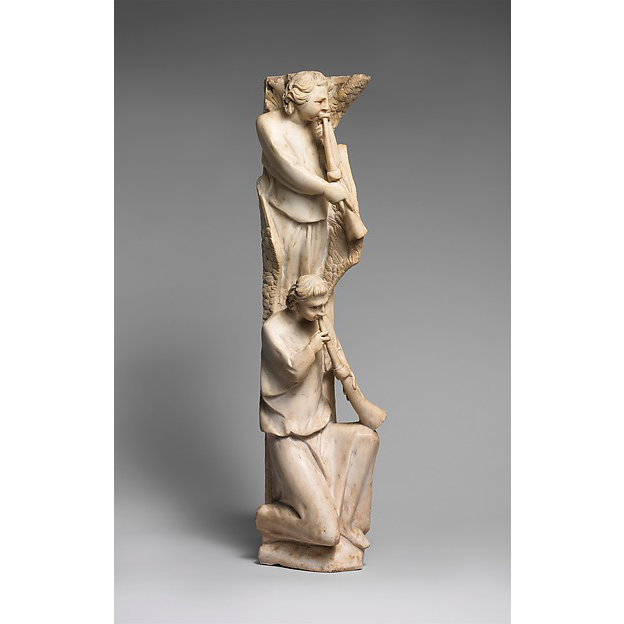

In [37]:
img = getsquared_image('https://images.metmuseum.org/CRDImages/md/web-large/DP169508.jpg')
img

In [44]:
df.columns

Index(['Unnamed: 0', 'Name', 'Wikidata-Q-ID', 'Wikipedia-URL', 'URL-names',
       'Summary', 'Wikipedia-json', 'image', 'thumbnail', 'birth', 'death',
       'timeline_position', 'VIAF', 'wikidata', 'MET Object Indices',
       'REAL MET Object IDS', 'cloudinary thumbnails', 'URL-list-small',
       'cloudinary artworks'],
      dtype='object')

## open all URLs and save the squared images names [artist-index]_[image-index].png

In [ ]:
# open all the URLs and save the squared images names [artist-index]_[image-index].png

count = 0

# iterate over artists
for i in range(len(df)):
    
    if new_df['URL-Liste-small'][i] == ['nan']:
        count += 1
        print(count)
        continue
    
    else:
        
        index = 0
        # iterate over list of urls
        for j in new_df['URL-Liste-small'][i]:
    
            if j == 'nan':
                index += 1
                continue
            elif j == '':
                index += 1
                continue
            else:
                img = getsquared_image(j.replace(' ', '%20'))
                filename = './thumbnails/MET/' + str(i) + '_' + str(index) + '.png'
                img.save(filename, 'PNG')
                index += 1
        
        print(count)
        count += 1
        

In [25]:
len(liste)

292

In [28]:
df.columns

Index(['Name', 'Wikidata-Q-ID', 'Wikipedia-URL', 'URL-names', 'Summary',
       'Wikipedia-json', 'image', 'thumbnail', 'birth', 'death',
       'timeline_position', 'VIAF', 'wikidata', 'MET Object Indices',
       'REAL MET Object IDS', 'URL-Liste-small'],
      dtype='object')

# SAVE df as csv

In [26]:
filename = 'artist_qid.csv'
df.to_csv(filename, index = False, header=True)
